In [2]:
import numpy as np
import pandas as pd
from analysis_functions import *
import matplotlib.pyplot as plt
import seaborn as sns

Single UE Case

In [3]:
distances = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]


In [4]:
for distance in distances:
    tp = get_per_ue_throughput(f'1_{distance}.log')
    print(distance, ', ',  tp[0])

100 ,  285.74758395989977
200 ,  157.64551879699218
300 ,  111.84922305764425
400 ,  83.2692155388472
500 ,  67.92602756892248
600 ,  67.92602756892248
700 ,  55.32832080200515
800 ,  50.89689724310793
900 ,  45.84423558897255
1000 ,  36.31277944862186


In [5]:
def serving_rsrp(dname):
    file = open(dname)
    lines = file.readlines()
    serving_rsrp = defaultdict(lambda:float())
    for line in lines:
        if "from serving eNB" in line:
            spl = line.split()
            ue_id = int(spl[6][0])
            rsrp = float(spl[7])
            serving_rsrp[ue_id] = rsrp
            if (len(serving_rsrp.keys()) == 1):
                return serving_rsrp


In [6]:
for distance in distances:
    result = serving_rsrp(f'1_{distance}.log')
    print(distance, ', ', list(result.values())[0])
    

100 ,  -108.49
200 ,  -119.808
300 ,  -126.429
400 ,  -131.127
500 ,  -137.748
600 ,  -137.748
700 ,  -140.265
800 ,  -142.446
900 ,  -144.369
1000 ,  -146.09


Dual Cell Interference Impact


In [7]:
distances = [100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 2000]

In [8]:
for distance in distances:
    tp = get_per_ue_throughput(f'{distance}.log')
    print(distance, tp)

100 {0: 266.07734335839484, 1: 60.83747117794495}
300 {0: 93.01952380952378, 1: 60.83747117794495}
500 {0: 60.83747117794495, 1: 60.83747117794495}
700 {0: 36.85717293233113, 1: 60.83747117794495}
900 {0: 23.160526315789316, 1: 60.83747117794495}
1100 {0: 60.83747117794495, 1: 34.101934837092955}
1300 {0: 60.83747117794495, 1: 58.054320802005385}
1500 {0: 60.83747117794495, 1: 72.37975438596501}
1700 {0: 60.83747117794495, 1: 133.66793734335837}
2000 {0: 60.83747117794495, 1: 270.0844185463651}


Distance:  500 {0: 60.8, 1: 60.8} <br>
Distance:  500 {0: 97.9}

In [9]:
def serving_rsrp(dname):
    file = open(dname)
    lines = file.readlines()
    serving_rsrp = defaultdict(lambda:float())
    for line in lines:
        if "from serving eNB" in line:
            spl = line.split()
            ue_id = int(spl[6][0])
            rsrp = float(spl[7])
            serving_rsrp[ue_id] = rsrp
            if (len(serving_rsrp.keys()) == 2):
                return serving_rsrp


In [10]:
def interference_rsrp(dname):
    file = open(dname)
    lines = file.readlines()
    interference_rsrp = defaultdict(lambda:float())
    for line in lines:
        if "interference from" in line:
            spl = line.split()
            ue_id = int(spl[5][0])
            i_rsrp = float(spl[6])
            interference_rsrp[ue_id] = i_rsrp
            if (len(interference_rsrp.keys()) == 2):
                return interference_rsrp

In [11]:
for distance in distances:
    results = serving_rsrp(f'{distance}.log')
    print(distance, results.values())

100 dict_values([-108.49, -134.771])
300 dict_values([-126.429, -134.771])
500 dict_values([-134.771, -134.771])
700 dict_values([-140.265, -134.771])
900 dict_values([-144.369, -134.771])
1100 dict_values([-134.771, -142.446])
1300 dict_values([-134.771, -137.748])
1500 dict_values([-134.771, -131.127])
1700 dict_values([-134.771, -119.808])
2000 dict_values([-134.771, -108.49])


In [12]:
for distance in distances:
    results = interference_rsrp(f'{distance}.log')
    print(distance, results.values())

100 dict_values([-154.088, -149.497])
300 dict_values([-151.954, -149.497])
500 dict_values([-149.497, -149.497])
700 dict_values([-146.605, -149.497])
900 dict_values([-143.087, -149.497])
1100 dict_values([-149.497, -144.941])
1300 dict_values([-149.497, -148.115])
1500 dict_values([-149.497, -150.772])
1700 dict_values([-149.497, -153.056])
2000 dict_values([-149.497, -155.976])


<Axes: >

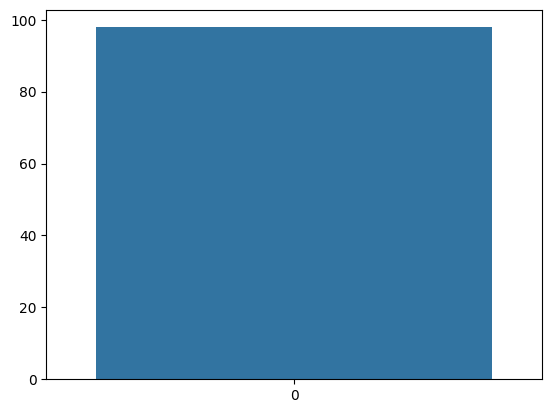

In [13]:
x = [97.9]
y = [1]
sns.barplot(x)

In [14]:
def barplot_nvars(y, xlabel,ylabel,title,labels,ticks=None,colors = None):
    print(y)
    N = len(y[0])
    print(N)
    ind = np.arange(N)
    plt.figure(figsize=(10,6))
    width = 0.55
    patterns = [ "" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*", "\\", "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
    counter = 0
    for i in range(len(y)):
        if colors != None:
            plt.bar(ind, y[i], width, label=labels[i], color=colors[counter], hatch=patterns[counter])
            counter+=1
        else:
            plt.bar(ind, y[i], width, label=labels[i])
            counter+=1
        ind = ind + width
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    ind = np.arange(N)
    if (ticks != None):
        plt.xticks(ind, ticks, rotation=0)

    # Finding the best position for legends and putting it
    plt.legend(loc='best')
    plt.show()

2
[[97.9, 0], [0, 60]]
2


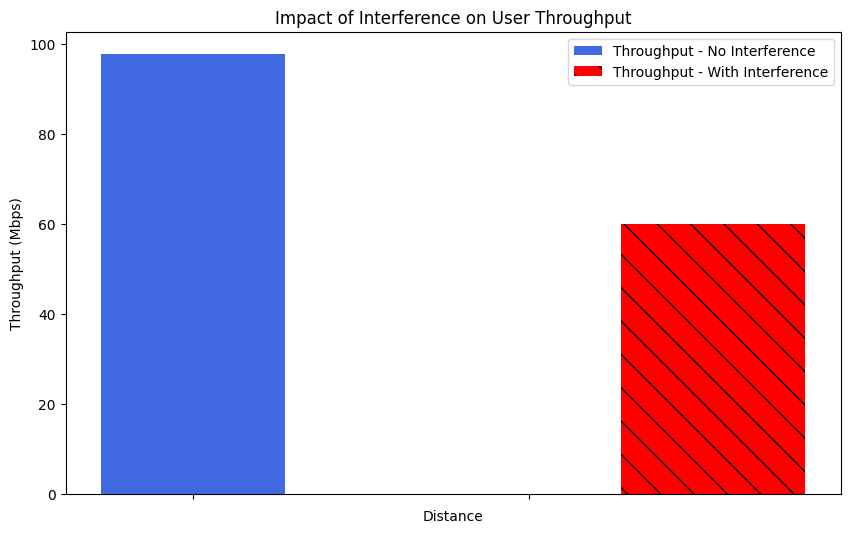

In [15]:
tp = [[97.9,0], [0, 60]]
data = tp
print(len(data[0]))
barplot_nvars(data, 'Distance', 'Throughput (Mbps)', 'Impact of Interference on User Throughput', ['Throughput - No Interference', 'Throughput - With Interference'], ['', ''], ['royalblue', 'red'])

In [27]:
moving_tp = [266, 150, 93, 60, 36, 23, 10,  0, 15, 34, 58, 72, 133, 150, 270]
distance_from_serving_cell = [100, 200, 300, 400, 500, 600, 700, 800, 700, 600, 500, 400, 300, 200, 100]
moving_snr = [-82, -94, -110, -115, -126, -134, -142, -144, -140, -137, -131, -119, -108, -94, -82]
interferene_snr = [-154, -150, -149, -149, -146, -143, -147, -140,  -148, -150, -151, -153, -155, -150, -154]

print(len(moving_tp))
print(len(distance_from_serving_cell))
print(len(moving_snr))
print(len(interferene_snr))

15
15
15
15


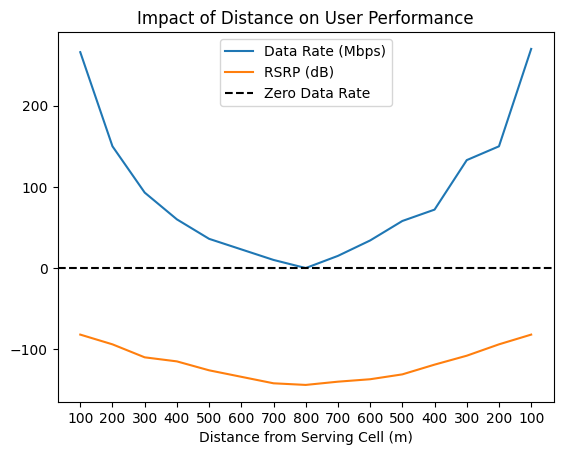

In [28]:
plt.plot(moving_tp, label='Data Rate (Mbps)')
plt.plot(moving_snr, label='RSRP (dB)')
# plt.plot(interferene_snr, label='Interference SNR (dB)')
plt.axline((0, 0), (12, 0), color='black', linestyle='--', label='Zero Data Rate')
plt.xticks(np.arange(len(moving_tp)), distance_from_serving_cell)
plt.xlabel('Distance from Serving Cell (m)')
plt.title('Impact of Distance on User Performance')
plt.legend()

([<matplotlib.axis.XTick at 0x7f1d5ccf1f10>,
 [Text(0, 0, '100'),
  Text(1, 0, '200'),
  Text(2, 0, '300'),
  Text(3, 0, '400'),
  Text(4, 0, '500'),
  Text(5, 0, '600'),
  Text(6, 0, '700'),
  Text(7, 0, '800'),
  Text(8, 0, '700'),
  Text(9, 0, '600'),
  Text(10, 0, '500'),
  Text(11, 0, '400'),
  Text(12, 0, '300'),
  Text(13, 0, '200'),
  Text(14, 0, '100')])

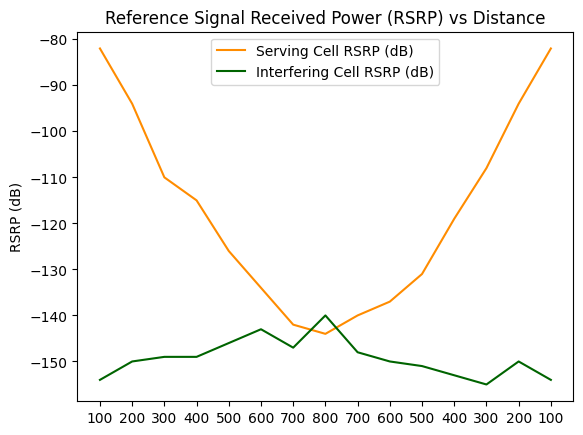

In [29]:
plt.plot(moving_snr, label='Serving Cell RSRP (dB)', color='darkorange')
plt.ylabel('RSRP (dB)')
plt.title('Reference Signal Received Power (RSRP) vs Distance')
plt.plot(interferene_snr, label='Interfering Cell RSRP (dB)', color='darkgreen')
plt.legend()
plt.xticks(np.arange(len(moving_tp)), distance_from_serving_cell)

In [31]:
import random
a = 30
b = 50.0
n = 100
seperate = [random.uniform(a, b) for _ in range(n)]

a = 50
b = 70.0
n = 100
together = [random.uniform(a, b) for _ in range(n)]